# Анализ поведения пользователей сервиса аренды самокатов

Этот проект посвящён исследованию данных мобильного приложения, предоставляющего услуги аренды самокатов. В рамках исследования анализируются данные о пользователях из нескольких городов России, их поездках и взаимодействии с сервисом. 

**Цель исследования:** Изучить различия в поведении пользователей, использующих разные тарифные планы (стандартный и премиальный), и выявить ключевые закономерности, которые могут быть полезны для оптимизации бизнес-стратегий.

Таким образом, исследование пройдёт в 6 этапов:
 1. Обзор данных
 2. Предобработка данных
 3. Исследовательский анализ данных
 4. Объединение данных
 5. Подсчёт выручки
 6. Проверка гипотез

## Загрузка и импорт библиотек

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
def data_info(df):
    '''
    Отображает первые 5 строк, общую информацию и описательную статистику DataFrame.

    '''
    display(df.head())
    df.info()
    display(df.describe().round(3))

In [3]:
def plt_bar(df, column, title, xlabel, ylabel, values='user_id', aggfunc='count', x_rotation=35,
            figsize=(6, 4), color_plt='cornflowerblue'):
    
    '''
    Создает сводную таблицу и столбчатую диаграмму для указанного столбца DataFrame.
    
    Args:
        df (pandas.DataFrame): DataFrame.
        column (str): Столбец, по которому будет строиться сводная таблица и график.
        title (str): Заголовок для графика.
        xlabel (str): Название оси x для графика.
        ylabel (str): Название оси y для графика.
        values (str, optional): Столбец для агрегации в сводной таблице. По умолчанию 'user_id'.
        aggfunc (str or function, optional): Функция агрегации для сводной таблицы. По умолчанию 'count'.
        x_rotation (int, optional): Поворот значений оси x. По умолчанию 35.
        figsize (tuple, optional): Размеры графика (ширина, высота). По умолчанию (6, 4).
        color_plt (str, optional): Цвет графика. По умолчанию 'cornflowerblue'.
    '''

    # Сводная таблица
    column_pivot_bar = (
        df
        .pivot_table(index=column, values=values, aggfunc=aggfunc)
        .sort_values(by=values, ascending=False)
    ) 
    column_pivot_bar.columns = ['Частота']
    display(column_pivot_bar)

    # Столбчатая диаграмма
    column_pivot_bar.plot(y='Частота', kind='bar', figsize=figsize, color=color_plt, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=x_rotation)
    plt.show()

In [4]:
def plt_pie_pivot (df, column, title, values='user_id', figsize=(4, 4)):
    '''
    Создает сводную таблицу и круговую диаграмму для указанного столбца DataFrame.
    
    Args:
        df (pandas.DataFrame): DataFrame.
        column (str): Столбец, по которому будет строиться сводная таблица и диаграмма.
        title (str): Заголовок для диаграммы.
        values (str): Столбец для агрегации в сводной таблице. По умолчанию 'user_id'.
        figsize (tuple, optional): Размеры графика (ширина, высота). По умолчанию (4, 4).
    '''
    
    # Сводная таблица
    column_pivot = (
        df
        .pivot_table(index=column,values=values, aggfunc='count')
        .sort_values(by=values, ascending=False)
        )
    column_pivot.columns = ['Количество']
    display(column_pivot)

    # Круговая диаграмма
    column_pivot.plot(kind='pie', figsize=figsize, subplots=True, autopct='%1.2f%%', ylabel='', 
                      colormap='tab10', legend=False)
    plt.title(title)
    plt.show()

In [5]:
def plt_hist(df, column, title, label, bins=20, figsize=(6, 4)):
    '''
    Строит гистограмму для указанного столбца DataFrame.
    
    Args:
        df (pandas.DataFrame): DataFrame.
        column (str): Столбец, для которого будет строится график.
        title (str): Заголовок для графика.
        label (str): Название оси x для графика.
        bins (int, optional): Количество бинов для гистограммы. По умолчанию 20.
        figsize (tuple, optional): Размеры графика (ширина, высота). По умолчанию (6, 4).
    '''
    
    # Описательные статистики
    print(f'Описательные статистики параметра {title}')
    display(pd.DataFrame(df[column].describe()).T.style.format(precision=3))
    
    # Гистограмма
    plt.figure(figsize=figsize) 
    plt.hist(df[column], bins=30, color='mediumseagreen', edgecolor='black') 
    plt.title(f'Гистограмма - {title}')
    plt.xlabel(label)
    plt.ylabel('Частота')
    plt.grid()
    plt.show()

## Загрузка и обзор данных

In [6]:
# Загрузка данных
try:
    users = pd.read_csv('users_go.csv')
    rides = pd.read_csv('rides_go.csv', parse_dates=['date'])
    subscriptions = pd.read_csv('subscriptions_go.csv')
    print('Данные успешно загружены')
except:
    print('Ошибка при загрузке')

Данные успешно загружены


Рассмотрим подробнее данные в каждом датафрейме.

In [7]:
# Вывод информации о датафрейме 'users'
data_info(users)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,age
count,1565.000,1565.000
mean,762.634,24.922
std,443.260,4.553
min,1.000,12.000
25%,378.000,22.000
50%,762.000,25.000
75%,1146.000,28.000
max,1534.000,43.000


Датафрейм **users** содержит следующую информацию:

* `user_id` - уникальный идентификатор пользователя
* `name` - имя пользователя
* `age` - возраст
* `city` - город
* `subscription_type` - тип подписки

In [8]:
# Вывод информации о датафрейме 'rides'
data_info(rides)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


,user_id,distance,duration,date
count,18068.000,18068.000,18068.000,18068
mean,842.870,3070.660,17.805,2021-06-30 19:47:21.266327296
min,1.000,0.856,0.500,2021-01-01 00:00:00
25%,487.000,2543.226,13.598,2021-04-02 00:00:00
50%,889.000,3133.610,17.678,2021-06-30 00:00:00
75%,1213.250,3776.223,21.725,2021-09-28 00:00:00
max,1534.000,7211.008,40.824,2021-12-30 00:00:00
std,434.734,1116.831,6.091,NaN


Датафрейм **rides** содержит следующую информацию:

* `user_id` - уникальный идентификатор пользователя
* `distance` -	расстояние, которое пользователь проехал в текущей сессии (в метрах)
* `duration` -	продолжительность сессии (в минутах)
* `date` -	дата совершения поездки

In [9]:
# Вывод информации о датафрейме 'subscriptions'
data_info(subscriptions)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


,minute_price,start_ride_price,subscription_fee
count,2.000,2.000,2.000
mean,7.000,25.000,99.500
std,1.414,35.355,140.714
min,6.000,0.000,0.000
25%,6.500,12.500,49.750
50%,7.000,25.000,99.500
75%,7.500,37.500,149.250
max,8.000,50.000,199.000


Датафрейм **subscriptions** содержит следующую информацию:
    
* `subscription_type` - тип подписки
* `minute_price` - 	стоимость одной минуты поездки по данной подписке
* `start_ride_price` -	стоимость начала поездки
* `subscription_fee` -	стоимость ежемесячного платежа


**Общая предварительная оценка данных:**
- Набор данных достаточен для исследовательского анализа.
- Данные разделены на 3 датафрейма: *users* содержит 1565 строк с информацией об уникальных пользователях приложения; *rides* содержит 18068 строк с информацией о поездках пользователей; и *subscriptions* содержит 2 строки с описанием тарифных планов.
- Часть данных содержит дубликаты. Пропущенных значений не обнаружено.

Для дальнейшей работы с данными устраним проблемы в них, выполнив предобработку.

## Предобработка данных

### Обработка дубликатов

Проверим данные на наличие дубликатов:

In [10]:
# Словарь со всеми датафреймами
all_df = {
    'users': users,
    'rides': rides,
    'subscriptions': subscriptions
}

# Проверка явных дубликатов
for name, df in all_df.items():
    print(f'Количество дубликатов в {name}:', df.duplicated().sum())

Количество дубликатов в users: 31
Количество дубликатов в rides: 0
Количество дубликатов в subscriptions: 0


In [11]:
# Удаление дубликатов в 'users' и проверка их удаления
users.drop_duplicates(inplace=True)
print(f'Количество дубликатов в users:', users.duplicated().sum())

Количество дубликатов в users: 0


Пропущенные значения были найдены только в датафрейме **users**. Избавились от них.

### Дополнение данных

Все столбцы в датафреймах имеют верно определенные типы данных.

Добавим в датафрейм **rides** столбец с номером месяца:

In [12]:
# Добавление столбца с месяцем
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


В результате предобработки данных:

* Были удалены дубликаты в датафрейме **users**. Они составили 1,98% от общего объема данных.
* Был добавлен столбец *'month'* в датафрейм **rides**.
* Были проверены пропущенные значения, их не обнаружили.

## Исследовательский анализ данных

Проанализируем и визуализируем общую информацию о пользователях и их поездках:

### Частота встречаемости городов

,Частота
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


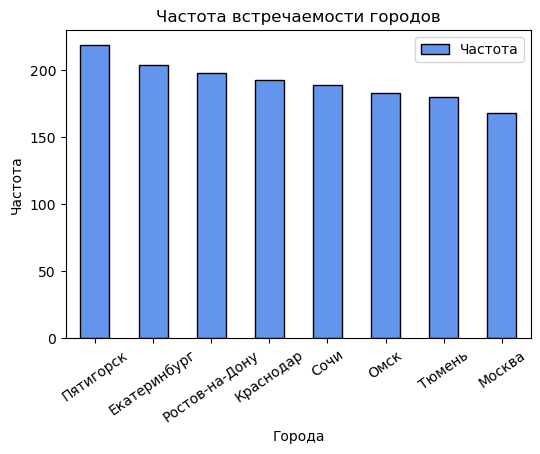

In [13]:
# График по столбцу 'city'
plt_bar(users, 'city', title='Частота встречаемости городов', xlabel='Города', ylabel='Частота')

Исходя из данных, наибольшее число пользователей находится в **Пятигорске** - 219 уникальных пользователей. Меньше всего же - в **Москве** - 168 пользователей.

### Cоотношение пользователей с подпиской и без подписки

,Количество
subscription_type,
free,835
ultra,699


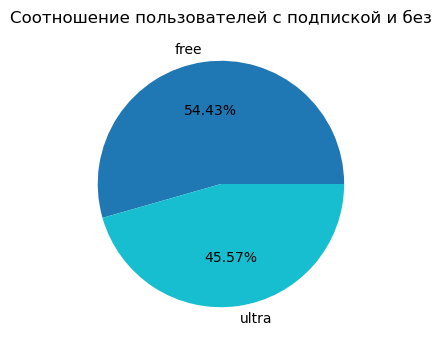

In [14]:
# График по столбцу 'subscription_type'
plt_pie_pivot(users, 'subscription_type', title='Соотношение пользователей с подпиской и без')

Пользователей **без подписки на 19,4% больше**, чем с подпиской. Всего без подписки 835 уникальных пользователей (или 54,43%), с подпиской ultra - 699 пользователей (или 45,57%).

### Возраст пользователей

Описательные статистики параметра Возраст пользователей


,count,mean,std,min,25%,50%,75%,max
age,1534.000,24.904,4.572,12.000,22.000,25.000,28.000,43.000


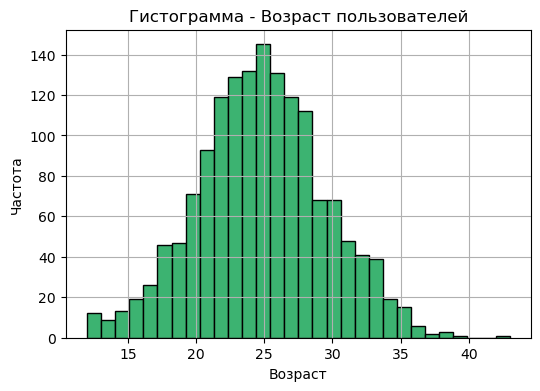

In [15]:
# Графики по столбцу 'age'
plt_hist(users, 'age', title='Возраст пользователей', label='Возраст')

Средний возраст пользователей составляет **25 лет**. 50% пользователей находятся в возрасте от 22 до 28 лет. Пользователей младше 16 и старше 36 лет крайне мало, что видно на гистограмме и на боксплоте.

### Расстояние одной поездки пользователя

Описательные статистики параметра Расстояние одной поездки пользователя


,count,mean,std,min,25%,50%,75%,max
distance,18068.000,3070.660,1116.831,0.856,2543.226,3133.610,3776.223,7211.008


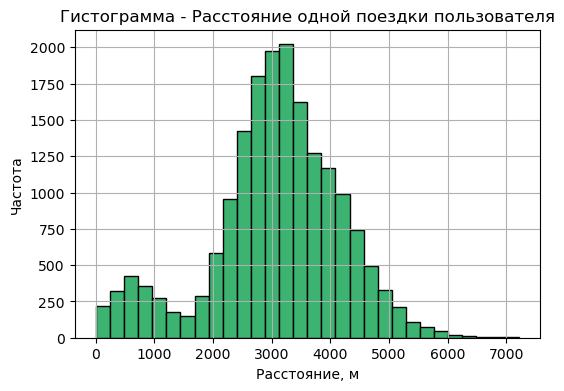

In [16]:
# Графики по столбцу 'distance'
plt_hist(rides, 'distance', title='Расстояние одной поездки пользователя', label='Расстояние, м')

В среднем пользователь в течение одной поездки проезжает **3070 м.(~3 км)**. Расстояние около половины совершенных поездок находится в диапазоне от 2,5 до 3,7 км.

Также на графике выделяется небольшой всплеск в районе 500 м. Можем предположить, что в этих случаях пользователи совершают поездки, чтобы добраться до близлежащей инфраструктуры (магазин, учебное заведение, кафе и тд)

### Продолжительность поездок

Описательные статистики параметра Продолжительность поездок


,count,mean,std,min,25%,50%,75%,max
duration,18068.000,17.805,6.091,0.500,13.598,17.678,21.725,40.824


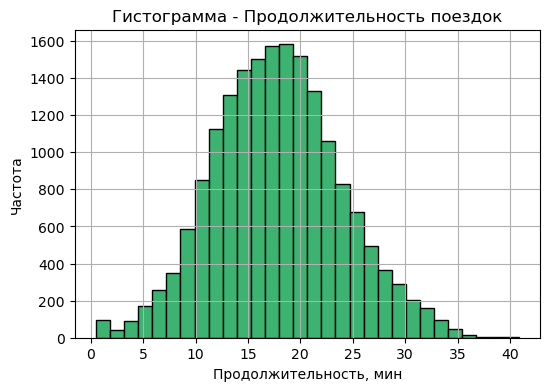

In [17]:
# Графики по столбцу 'duration'
plt_hist(rides, 'duration', title='Продолжительность поездок', label='Продолжительность, мин')

В среднем поездка занимает у пользователя **17-18 минут**. Около половины поездок совершаются в пределах 13-22 минут. Поездок менее 7 и более 30 минут крайне мало.

**Выводы**

Рассмотрев основные параметры пользователей и совершенных ими поездок, мы проанализировали распределение значений по каждому параметру, выявили средние значения, а также аномальные. В результате выяснили:
* Больше всего пользователей находятся в Пятигорске. Меньше всего - в Москве.
* 54,43% пользователей совершают поездки без подписки.
* Средний возраст пользователей составляет 25 лет.
* Среднее расстояние, совершаемое за одну поездку - 3,07 км
* Средняя продолжительность поездки составляет 17-18 минут.

## Объединение данных

Для дальнейшей работы с данными объединим три датафрейма в один. Сначала присоединим данные по поездкам **rides** к данным с пользователями **users**, используя столбец ``user_id``. После этого, добавим информацию по тарифам **subscriptions**. Для начала проверим, совпадает ли количество уникальных пользователей в двух датафреймах:

In [18]:
print('Количество уникальных пользователей в users', users.shape[0])
print('Количество уникальных пользователей в rides', users.shape[0])

Количество уникальных пользователей в users 1534
Количество уникальных пользователей в rides 1534


Количество совпадает, поэтому приступаем к объекдинению данных.

In [19]:
# Объединение 3 датафореймов в 'all_data'
all_data = pd.merge(users, rides, on='user_id', how='outer')
all_data = all_data.merge(subscriptions, on='subscription_type', how='outer')
all_data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


Теперь на основе объединенного **all_data** создадим 2 датафрейма: с данными о пользователях без подписки и с подпиской:

In [20]:
# Создание датафреймов с пользователями без подписки и с подпиской
sub_free = all_data.query('subscription_type == "free"')
sub_ultra = all_data.query('subscription_type == "ultra"')

Рассмотрим данные о расстоянии и длительности поездок в разрезе используемого тарифного плана.

Сравним распределение **расстояния поездок** пользователей с подпиской и без:

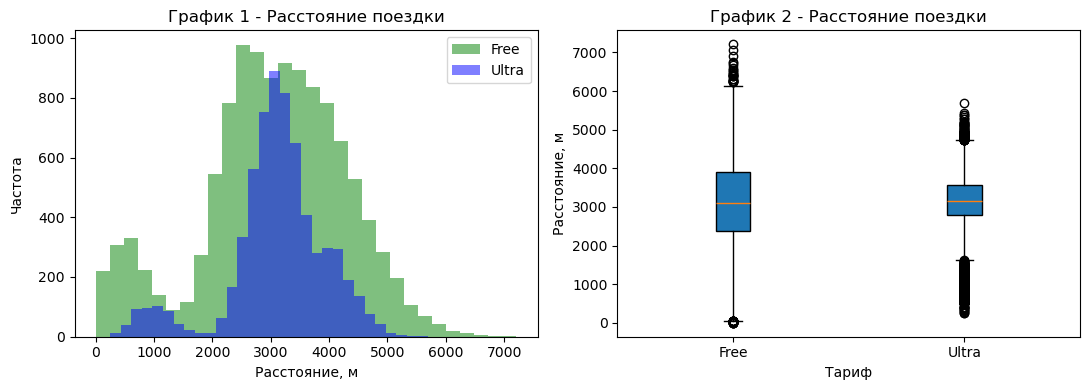

In [21]:
# Построение графиков по параметру 'distance'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))

# Создание гистограммы
ax1.hist(sub_free['distance'], bins=30, alpha=0.5, label='Free', color='green')
ax1.hist(sub_ultra['distance'], bins=30, alpha=0.5, label='Ultra', color='blue')
ax1.set_title('График 1 - Расстояние поездки')
ax1.set_xlabel('Расстояние, м')
ax1.set_ylabel('Частота')
ax1.legend()

# Создание диаграммы размаха
distance_boxplot = [sub_free['distance'], sub_ultra['distance']]
labels = ['Free', 'Ultra']
ax2.boxplot(distance_boxplot, labels=labels, patch_artist=True)
ax2.set_title('График 2 - Расстояние поездки')
ax2.set_xlabel('Тариф')
ax2.set_ylabel('Расстояние, м')

plt.tight_layout()
plt.show()

На графике 1 видим, что в целом форма распределения у пользователей с подпиской и без совпадают. Среднее расстояние у обеих категорий составляет около 3 км. 

Однако у категорий отличается размах значений (график 2). Пользователи без подписки имеют более широкий размах - встречаются и очень короткие поездки до 1 км и длинные поездки в более 5-6 км. Что вполне логично, т.к. пользователи, использующие сервис редко/единожды, могут совершать поездки по самым разным целям, от чего в том числе зависит и расстояние поездки.

А пользователи с подпиской в подавляющем большинстве совершают поездки в диапазоне 1,5-4,5 км. Значения менее 1,5 км и более 4,5 км встречаются намного реже и являются скорее аномальными. Предполагаем, что пользователи оформляют подписку, чтобы выгодно совершать частые поездки по определенному маршруту (например, учеба, работа и т.д.). Для объектов в пешей доступности использовать подписку может быть нерационально. Так же и для дальних объектов (свыше 5-6 км), когда удобнее и выгоднее может быть другой вид транспорта.

Далле рассмотрим распределение **продолжительности поездок** в зависимости от тарифного плана:

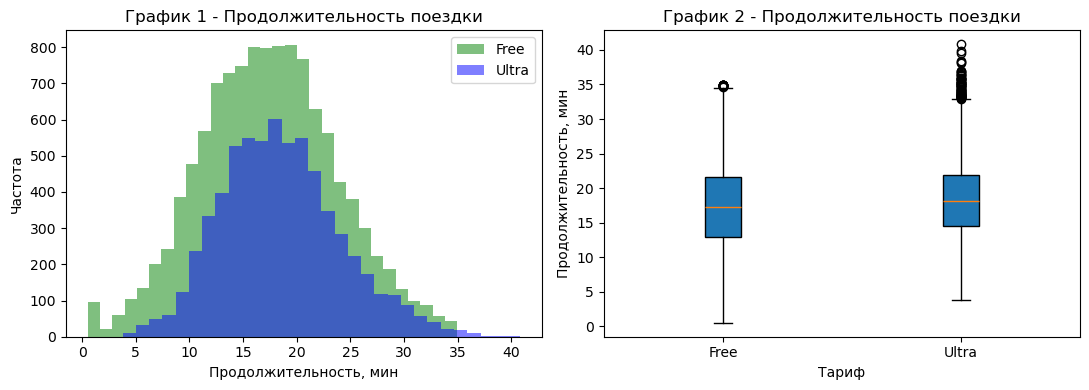

In [22]:
# Построение графиков по параметру 'duration'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))

# Создание гистограммы
ax1.hist(sub_free['duration'], bins=30, alpha=0.5, label='Free', color='green')
ax1.hist(sub_ultra['duration'], bins=30, alpha=0.5, label='Ultra', color='blue')
ax1.set_title('График 1 - Продолжительность поездки')
ax1.set_xlabel('Продолжительность, мин')
ax1.set_ylabel('Частота')
ax1.legend()

# Создание диаграммы размаха
distance_boxplot = [sub_free['duration'], sub_ultra['duration']]
labels = ['Free', 'Ultra']
ax2.boxplot(distance_boxplot, labels=labels, patch_artist=True)
ax2.set_title('График 2 - Продолжительность поездки')
ax2.set_xlabel('Тариф')
ax2.set_ylabel('Продолжительность, мин')

plt.tight_layout()
plt.show()

В целом распределение значений по обеим категориям схоже. Среднее время совершенных поездок у пользователей с подпиской и без составляет 16-18 минут. 

Что стоит отметить, у пользователей с подпиской чаще, чем у пользователей без, встречаются поездки более 30-35 минут. Можем объяснить это тем, что с подпиской стоимость минуты меньше, чем без, + бесплатный старт. Поэтому пользователи совершают поездки на более комфортной скорости (что может увеличить общее время поездки), а не стремятся завершить поездку в максимально короткий срок.

**Выводы:**

В результате даного этапа мы объединили все данные в 1 датафрейм **all_data**. Также выделили данные о пользователях с подпиской (**sub_ultra**) и без подписки (**sub_free**). Они понадобятся нам на этапе подсчета выручки.

Также мы проанализировали данные о расстоянии и длительности поездок в зависимости от тарифного плана:
* Распределение расстояния у пользователей обеих категорий в целом совпадает. За исключением размаха значений - у пользователей без подписки он намного шире, чем у пользователей с подпиской.
* Распределение продолжительности поездок показало, что пользователей с подпиской реже совершают короткие поездки и больше длинные, чем пользователи без подписки.



## Подсчёт выручки

Рассчитаем помесячную выручку для каждого пользователя. Перед этим посчитаем количество поездок, суммарное расстояние и суммарное время для каждого пользователя за каждый месяц.

In [23]:
# Продолжительность поездок округлим в бОльшую сторону
all_data['duration'] = np.ceil(all_data['duration']).astype(int)

# Создание датафрейма с агрегированными данными о поездках
all_data_profit = (
    all_data
    .groupby(by=['user_id','month', 'subscription_type'], as_index=False)
    .agg({'distance':['count', 'sum'],'duration':'sum'})
)
all_data_profit.columns = ['user_id', 'month', 'subscription_type', 'rides_count', 'distance_sum', 'duration_sum']
all_data_profit

,user_id,month,subscription_type,rides_count,distance_sum,duration_sum
0,1,1,ultra,2,7027.511294,42
1,1,4,ultra,1,754.159807,7
2,1,8,ultra,2,6723.470560,46
3,1,10,ultra,2,5809.911100,32
4,1,11,ultra,3,7003.499363,56
...,...,...,...,...,...,...
11326,1534,6,free,2,3409.468534,26
11327,1534,8,free,2,7622.453034,48
11328,1534,9,free,1,4928.173852,23
11329,1534,11,free,4,13350.015305,78


* `rides_count` - количество поездок за месяц
* `distance_sum` - суммарное расстояние поездок за месяц (в метрах)
* `duration_sum` - суммарное время поездок за месяц (в минутах)

Рассчитаем выручку по каждому пользователю по месяцам. Для расчета используем информацию по тарифным планам:

**Без подписки:**
* абонентская плата отсутствует;
* стоимость одной минуты поездки — 8 рублей;
* стоимость старта (начала поездки) — 50 рублей;

**С подпиской Ultra:**
* абонентская плата — 199 рублей в месяц;
* стоимость одной минуты поездки — 6 рублей;
* стоимость старта — бесплатно.

In [24]:
#Создание функции для расчета выручки в зависимости от тарифного плана
def profit_for_month (row):
    sub_type = row['subscription_type']
    rides = row['rides_count']
    duration = row['duration_sum']
    
    if sub_type == 'ultra':
        return 199 + (6 * duration)
    else:
        return (50 * rides) + (8 * duration)

# Добавление столбца с выручкой
all_data_profit['monthly_profit'] = all_data_profit.apply(profit_for_month, axis=1)
all_data_profit

,user_id,month,subscription_type,rides_count,distance_sum,duration_sum,monthly_profit
0,1,1,ultra,2,7027.511294,42,451
1,1,4,ultra,1,754.159807,7,241
2,1,8,ultra,2,6723.470560,46,475
3,1,10,ultra,2,5809.911100,32,391
4,1,11,ultra,3,7003.499363,56,535
...,...,...,...,...,...,...,...
11326,1534,6,free,2,3409.468534,26,308
11327,1534,8,free,2,7622.453034,48,484
11328,1534,9,free,1,4928.173852,23,234
11329,1534,11,free,4,13350.015305,78,824


В результате получили значение `monthly_profit` - помесячная выручка в рублях по каждому пользователю.

**Выводы:**

* Рассчитали суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
* Высчитали помесячную выручку, которую принёс каждый пользователь в завимисоти от используемого тарифного плана.

## Проверка гипотез

### Пользователи с подпиской тратят больше времени на поездки

Проверим первую гипотезу. Тратят ли пользователи с подпиской больше времени на поездки, чем пользователи без подписки. Для этого проанализируем данные в столбце *duration* в датафреймах с пользователями с подпиской (**sub_ultra**) и без подписки (**sub_free**). Сформулируем нулевую и альтурнативную гипотезы:

**H0 (нулевая гипотеза)**: Продолжительность поездки пользователей ultra = Продолжительность поездки пользователей free

**H1 (альтернативная гипотеза)**: Продолжительность поездки пользователей ultra > Продолжительность поездки пользователей free

In [25]:
# Установка уровня статистической значимости
alpha = 0.05

# Проверка гипотезы
duration_hypothesis = st.ttest_ind(sub_ultra['duration'], sub_free['duration'], alternative='greater')

print('Средняя продолжительность поездки пользователей Ultra:', sub_ultra['duration'].mean().round(2))
print('Средняя продолжительность поездки пользователей Free:', sub_free['duration'].mean().round(2))

print('P-значение:', duration_hypothesis.pvalue)

if duration_hypothesis.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Средняя продолжительность поездки пользователей Ultra: 18.54
Средняя продолжительность поездки пользователей Free: 17.39
P-значение: 1.2804098316645613e-34
Отвергаем нулевую гипотезу


Пользователи с подпиской действительно тратят больше времени на поездки, чем пользователи без подписки. Таким образом, подписчики являются более выгодными для компании.

### Пользователи с подпиской проезжают за 1 поездку не более 3130 метров

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Проверим гипогтезу, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. Для этого проанализируем данные в столбце *distance* в датафрейме **sub_ultra**. Сформулируем нулевую и альтернативную гипотезы:

**H0 (нулевая гипотеза)**: Расстояние одной поездки пользователя с подпиской = 3130 метров

**H1 (альтернативная гипотеза)**: Расстояние одной поездки пользователя с подпиской > 3130 метров

In [26]:
distance_level = 3130

# Установка уровня статистической значимости
alpha = 0.05

# Проверка гипотезы
distance_hypothesis = st.ttest_1samp(sub_ultra['distance'], distance_level, alternative='greater')

print('Среднее расстояние поездки пользователей Ultra:', sub_ultra['distance'].mean().round(2))

print('P-значение:', distance_hypothesis.pvalue)

if (distance_hypothesis.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

Среднее расстояние поездки пользователей Ultra: 3115.45
P-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


Таким образом, пользователи с подпиской действительно в среднем за одну поездку проезжают расстояние, не превышающее 3130 метров.

### Помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки

Проверим гипотезу о том, является ли помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки. Для этого разделим датафрейм с посчитанной выручкой **all_data_profit** на пользователей с подпиской и без. Сформулируем нулевую и альтернативную гипотезы:

**H0 (нулевая гипотеза)**: Помесячная выручка от пользователей Ultra = Помесячная выручка от пользователей Free

**H1 (альтернативная гипотеза)**: Помесячная выручка от пользователей Ultra > Помесячная выручка от пользователей Free

In [27]:
# Разделение пользователей по тарифному плану
all_data_profit_free = all_data_profit.query('subscription_type == "free"')
all_data_profit_ultra = all_data_profit.query('subscription_type == "ultra"')

# Установка уровня статистической значимости
alpha = 0.05

# Проверка гипотезы
profit_hypothesis = st.ttest_ind(
    all_data_profit_ultra['monthly_profit'], 
    all_data_profit_free['monthly_profit'], 
    alternative='greater')

print('Средняя выручка от пользователей Ultra за месяц:', all_data_profit_ultra['monthly_profit'].mean().round(2))
print('Средняя выручка от пользователей Free за месяц:', all_data_profit_free['monthly_profit'].mean().round(2))

print('P-значение:', profit_hypothesis.pvalue)

if profit_hypothesis.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Средняя выручка от пользователей Ultra за месяц: 362.79
Средняя выручка от пользователей Free за месяц: 328.64
P-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


По результатам теста у нас есть основания полагать, что помесячная выручка от пользователей с подпиской действительно больше, чем выручка от пользователей без подписки. 

**Выводы:**

Мы проверили 3 гипотезы, касающиеся пользователей с подпиской и их взаимодействия с сервисом. После проведения статистических тестов пришли к следующим выводам:
* Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.
* Расстояние, которое проезжают пользователи с подпиской за одну поездку, в среднем не превышает 3130 метров (оптимальное с точки зрения износа самоката)
* Выручка за месяц от пользователей с подпиской больше, чем выручка от пользователей без подписки. 

## Общий вывод

В ходе проведенного исследования данных сервиса аренды самокатов были выполнены следующие этапы и получены следующие основные результаты.

### Предобработка данных

Исследование началось с тщательной предобработки данных, состоящих из 3-ёх отдельных датафреймов.
* Были удалены дубликаты в данных. Они составили 1,98% от общего объема данных.
* Данные были приведены к соответствующим типам.
* Были проверены пропущенные значения, их не обнаружили.

### Ход исследования

В ходе исследования основных параметров пользователей и совершенных ими поездок, мы проанализировали распределение значений по каждому параметру. В результате выявили:
* Больше всего пользователей сервиса находятся в **Пятигорске** (219 пользователей или 14,3% от всего количества). 
* БОльшую часть пользователей составляют **пользователи без подписки** (54,43%). Подписку оформили 45,57% пользователей.
* Средний возраст пользователей составляет **25 лет**. Около половины всех пользователей составляют возрастную группу 22-28 лет.
* Среднее расстояние, совершаемое за одну поездку - **3,07 км**.
* Средняя продолжительность поездки составляет **17-18 минут**.

Помимо этого, мы сравнили данные о поездках (расстояние и длительность поездо) к в зависимости от тарифного плана пользователя. Пришли к следующим результатам:
1) **Расстояние поездок**. В целом распределение значений у пользователей обеих категорий совпадает. Раличается размах значений: пользователи с подпиской в подавляющем большинстве совершают поездки в диапазоне **1,5-4,5 км**. Размах же значений у пользователей без подписки шире в ~2 раза.

2) **Продолжительность поездок**. Распределение значений показало, что пользователей с подпиской реже совершают короткие поездки (до 5 минут) и больше длинные (более 30 минут), чем пользователи без подписки.

Далее была рассчитана выручка за каждый месяц по каждому уникальному пользователю.

### Итоги исследования

Основываясь на поставленных целях исследования и проверки предложенных гипотез, можно сделать следующие выводы. 

* Пользователи с подпиской Ultra тратят больше времени на поездки, чем пользователи без подписки.
* Расстояние, которое проезжают пользователи с подпиской за одну поездку, в среднем не превышает 3130 метров. Это расстояние - оптимальное с точки зрения износа самоката, таким образом оборудование служит дольше.
* Выручка за месяц от пользователей с подпиской Ultra больше, чем выручка от пользователей без подписки. 

Таким образом, пользователи с подпиской Ultra являются более выгодными для развития бизнеса. Для увеличения прибыли и лояльности клиентов, необходимо использовать данные, полученные в результате данного исследования, для разработки соответствующих маркетинговых стратегий и акций для привлечения новых пользователей с оформлением подписки.